In [245]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from copulae1 import *
from KDEs import *
from toolbox import *
import warnings
import itertools
import os
warnings.filterwarnings("ignore")

data = pd.read_csv('../processed_data/btc_future_crix.csv')
data.head()

ecdf_brr = ECDF(data.return_brr)
ecdf_btc = ECDF(data.return_btc)

u = ecdf_brr(data.return_brr)
v = ecdf_btc(data.return_btc)

brr = np.array(data.return_brr)
btc = np.array(data.return_btc)

kde_brr = KDE(data.return_brr, "Gaussian")
kde_btc = KDE(data.return_btc, "Gaussian")

kde_brr = KDE(data.return_brr, "Gaussian", kde_brr.h_brot*3)
kde_btc = KDE(data.return_brr, "Gaussian", kde_btc.h_brot*3)

calibration_method = 'MLE'

data_name = "coingecko_future_v1"
data_path = "../processed_data/"+data_name+"/"

spot_name = "log return bitcoin"
future_name = "log return future"

ls = os.listdir(data_path+'train/')
ls = [l for l in ls if l.endswith('.csv')]

if calibration_method == 'MLE':
    result_path = "../results/"+data_name+"/MLE/"
elif calibration_method == 'MM':
    result_path = "../results/"+data_name+"/MM/"



In [249]:
OHR = pd.read_hdf(result_path+"best_h.h5")

In [250]:
OHR

0.csv                                                     \
                 Variance  ERM k=10 ES q=0.01 ES q=0.05 ES q=0.10 VaR q=0.01   
Gaussian         0.866992  0.839746  0.937109  0.874805  0.833691   0.939062   
t_Copula         0.876953  0.868457  0.933301  0.906250  0.866211   0.949219   
t_Copula_Capped  0.886328  0.871680  0.946875  0.908789  0.867871   0.958203   
Clayton          0.767285  0.632422  0.668555  0.598535  0.617969   0.642187   
Frank            0.715137  0.676270  0.886133  0.678320  0.671094   0.671582   
Gumbel           0.840137  0.912793  1.168848  0.982031  0.922852   0.969922   
Plackett         0.793945  0.775391  0.881836  0.777148  0.768359   0.724805   
Gauss Mix Indep  0.855762  0.839355  0.919922  0.875391  0.835742   0.931738   

                                          1.csv            ...      8.csv  \
                VaR q=0.05 VaR q=0.10  Variance  ERM k=10  ... VaR q=0.05   
Gaussian          0.755957   0.713477  0.853320  0.835254  ...   0.784375   
t_Copula          0.784961   0.797266  0.881152  0.878906  ...   0.818164   
t_Copula_Capped   0.794629   0.779687  0.888672  0.877930  ...   0.821094   
Clayton           0.600000   0.701562  0.756348  0.627246  ...   0.703125   
Frank             0.642480   0.653418  0.694043  0.679785  ...   0.694531   
Gumbel            0.820117   0.762793  0.833594  0.928027  ...   0.836816   
Plackett          0.732031   0.760742  0.785840  0.788574  ...   0.799219   
Gauss Mix Indep   0.764648   0.734863  0.818848  0.832910  ...   0.828516   

                               9.csv                                          \
                VaR q=0.10  Variance  ERM k=10 ES q=0.01 ES q=0.05 ES q=0.10   
Gaussian          0.778516  0.819727  0.798437  0.802637  0.800879  0.800781   
t_Copula          0.851562  0.832031  0.828223  0.710937  0.807715  0.825781   
t_Copula_Capped   0.844727  0.845215  0.832031  0.796387  0.821680  0.831250   
Clayton           0.787500  0.676367  0.588867  0.476855  0.559473  0.599902   
Frank             0.709570  0.698828  0.679687  0.648437  0.671484  0.676367   
Gumbel            0.843750  0.819922  0.896973  0.988281  0.925195  0.905078   
Plackett          0.850391  0.769629  0.767285  0.658398  0.740527  0.766309   
Gauss Mix Indep   0.862500  0.767480  0.793359  0.470410  0.755176  0.802148   

                                                  
                VaR q=0.01 VaR q=0.05 VaR q=0.10  
Gaussian          0.807812   0.802930   0.790820  
t_Copula          0.798926   0.839844   0.867969  
t_Copula_Capped   0.812988   0.843555   0.872656  
Clayton           0.552246   0.717773   0.807031  
Frank             0.652051   0.670215   0.713379  
Gumbel            0.941211   0.863867   0.848437  
Plackett          0.725781   0.796680   0.863574  
Gauss Mix Indep   0.606641   0.835937   0.876562  

[8 rows x 96 columns]

In [251]:
HEs

file                0.csv                                                      \
risk_measure     ERM k=10 ES q=0.01 ES q=0.05 ES q=0.10 VaR q=0.01 VaR q=0.05   
Gaussian         0.656707  0.703348  0.729449  0.706170   0.692861   0.636769   
t_Copula         0.655287  0.705399  0.717609  0.707767   0.684868   0.650415   
t_Copula_Capped  0.654704  0.698091  0.715081  0.707848   0.677798   0.646601   
Clayton          0.559410  0.681514  0.574470  0.582772   0.633842   0.531950   
Frank            0.586330  0.730792  0.651047  0.623450   0.662855   0.556974   
Gumbel           0.637647  0.484124  0.642138  0.669829   0.668576   0.661470   
Plackett         0.641453  0.733106  0.744308  0.697206   0.714404   0.614243   
Gauss Mix Indep  0.656674  0.712601  0.729269  0.706271   0.698625   0.644952   

file                                     1.csv            ...      8.csv  \
risk_measure    VaR q=0.10  Variance  ERM k=10 ES q=0.01  ... VaR q=0.10   
Gaussian          0.387235  0.890461  0.771270  0.831374  ...   0.740166   
t_Copula          0.353592  0.890647  0.739451  0.836124  ...   0.689632   
t_Copula_Capped   0.301323  0.890615  0.740380  0.815973  ...   0.693892   
Clayton           0.406941  0.876019  0.666953  0.889220  ...   0.747421   
Frank             0.438419  0.859360  0.707992  0.860714  ...   0.752648   
Gumbel            0.305664  0.888820  0.644283  0.419419  ...   0.694500   
Plackett          0.309056  0.882120  0.777887  0.854735  ...   0.690362   
Gauss Mix Indep   0.351860  0.889977  0.772469  0.867611  ...   0.683365   

file                          9.csv                                           \
risk_measure     Variance  ERM k=10 ES q=0.01 ES q=0.05 ES q=0.10 VaR q=0.01   
Gaussian         0.705161  0.753358  0.741757  0.757123  0.767744   0.748416   
t_Copula         0.702477  0.742298  0.755745  0.755273  0.752179   0.751639   
t_Copula_Capped  0.699095  0.740576  0.744795  0.751492  0.748056   0.746539   
Clayton          0.711939  0.646848  0.564653  0.643162  0.680879   0.631621   
Frank            0.713976  0.724733  0.704724  0.750018  0.754735   0.725806   
Gumbel           0.704980  0.689109  0.545291  0.653579  0.692387   0.629081   
Plackett         0.712360  0.754460  0.712855  0.769654  0.764140   0.767455   
Gauss Mix Indep  0.713555  0.754129  0.559392  0.769495  0.767887   0.682953   

file                                             
risk_measure    VaR q=0.05 VaR q=0.10  Variance  
Gaussian          0.781746   0.743061  0.951425  
t_Copula          0.753032   0.736606  0.950832  
t_Copula_Capped   0.749378   0.734803  0.949709  
Clayton           0.759138   0.714096  0.925906  
Frank             0.772589   0.722218  0.933850  
Gumbel            0.729378   0.744118  0.951419  
Plackett          0.779326   0.738296  0.949295  
Gauss Mix Indep   0.756879   0.733301  0.949041  

[8 rows x 96 columns]

In [280]:
OHR1 = OHR.reset_index()
OHR1 = pd.melt(OHR1, id_vars = 'index')
OHR1.columns = ['copula', 'file', 'risk_measure', 'h']
OHR1.loc[:,'HE'] = OHR1.apply(lambda x: wrapper_HE(rm = x.risk_measure,
                                                   file = x.file, 
                                                   h = x.h, 
                                                   insample=True), axis=1)

In [281]:
HEs = pd.pivot_table(OHR1, index='copula', columns=['file', 'risk_measure'], values='HE')
HEs = HEs.reindex(OHR.index)

In [282]:
HEs.to_hdf(result_path+'In Sample Hedging Effectiveness.h5', key='df', mode='w')
HEs.to_html(result_path+'In Sample Hedging Effectiveness.html')


In [283]:
RMs = np.unique(OHR.droplevel(0,1).columns)

In [284]:
HEs

file                0.csv                                                      \
risk_measure     ERM k=10 ES q=0.01 ES q=0.05 ES q=0.10 VaR q=0.01 VaR q=0.05   
Gaussian         0.701862  0.799907  0.729462  0.707590   0.718936   0.709885   
t_Copula         0.703363  0.798831  0.732655  0.710515   0.714641   0.710425   
t_Copula_Capped  0.703307  0.802667  0.732866  0.710589   0.711042   0.705648   
Clayton          0.606507  0.627634  0.584622  0.606692   0.555902   0.644003   
Frank            0.637346  0.775890  0.648744  0.645430   0.569668   0.675304   
Gumbel           0.699138  0.736428  0.731566  0.707643   0.724294   0.697027   
Plackett         0.687244  0.772962  0.701947  0.694029   0.647778   0.716107   
Gauss Mix Indep  0.701818  0.795050  0.729533  0.707888   0.722130   0.709709   

file                                     1.csv            ...      8.csv  \
risk_measure    VaR q=0.10  Variance  ERM k=10 ES q=0.01  ... VaR q=0.10   
Gaussian          0.589078  0.924110  0.633317  0.699515  ...   0.654812   
t_Copula          0.639474  0.924838  0.639255  0.699753  ...   0.675349   
t_Copula_Capped   0.626385  0.925318  0.639196  0.698746  ...   0.667737   
Clayton           0.587036  0.904446  0.542981  0.622022  ...   0.669536   
Frank             0.542866  0.885196  0.573554  0.686145  ...   0.591510   
Gumbel            0.613449  0.921029  0.638815  0.646437  ...   0.669501   
Plackett          0.613780  0.911909  0.620658  0.698240  ...   0.672735   
Gauss Mix Indep   0.596735  0.923020  0.632831  0.672191  ...   0.676481   

file                          9.csv                                           \
risk_measure     Variance  ERM k=10 ES q=0.01 ES q=0.05 ES q=0.10 VaR q=0.01   
Gaussian         0.849705  0.620993  0.466913  0.605299  0.619129   0.652515   
t_Copula         0.850198  0.624797  0.484221  0.606090  0.623957   0.650698   
t_Copula_Capped  0.850399  0.625119  0.468093  0.607707  0.624591   0.653574   
Clayton          0.821208  0.538351  0.393979  0.529060  0.544947   0.524204   
Frank            0.828603  0.584699  0.496017  0.579291  0.579519   0.590416   
Gumbel           0.849750  0.626934  0.406803  0.605239  0.624753   0.651331   
Plackett         0.845150  0.614562  0.494137  0.595359  0.611123   0.635755   
Gauss Mix Indep  0.843057  0.620119  0.390107  0.598437  0.619439   0.575887   

file                                             
risk_measure    VaR q=0.05 VaR q=0.10  Variance  
Gaussian          0.673593   0.649462  0.846454  
t_Copula          0.670160   0.652091  0.846657  
t_Copula_Capped   0.669952   0.657379  0.846464  
Clayton           0.622912   0.652073  0.816837  
Frank             0.594575   0.593211  0.824794  
Gumbel            0.673751   0.654723  0.846460  
Plackett          0.673045   0.651406  0.841810  
Gauss Mix Indep   0.670379   0.662295  0.841474  

[8 rows x 96 columns]

In [302]:
i=100
OHR1.iloc[i,:]

copula              Frank
file                1.csv
risk_measure    ES q=0.10
h                0.672754
HE               0.589532
Name: 100, dtype: object

In [303]:
OHR1.iloc[i,:].risk_measure

'ES q=0.10'

In [304]:
file= OHR1.iloc[i,:].file
data = pd.read_csv(data_path+'train/'+file)
rs = data.loc[:,spot_name]
rf = data.loc[:,future_name]
hedging_effectiveness(rm=OHR1.iloc[i,:].risk_measure, rs=rs, rf=rf, h=OHR1.iloc[i,:].h)

0.5895322513633438

In [271]:
1 - ES(h_arr[0], rh[0])/ES(h_arr[0], rs[0])

nan

In [242]:
for i in range(len(RMs)):
    name = RMs[i]
    print(name)
    m = np.mean(HEs.droplevel(0,axis=1).loc[:,name], axis=1)
#     m = np.median(HEs.droplevel(0,axis=1).loc[:,name], axis=1)
    s = np.std(HEs.droplevel(0,axis=1).loc[:,name], axis=1)
    print(np.argmax(m))
    print(np.argmax(m/s))

ERM k=10
Gaussian
Clayton
ES q=0.01
Gaussian
Plackett
ES q=0.05
Plackett
Clayton
ES q=0.10
Gauss Mix Indep
Clayton
VaR q=0.01
Plackett
Frank
VaR q=0.05
Gauss Mix Indep
Frank
VaR q=0.10
t_Copula
Gaussian
Variance
t_Copula
Clayton


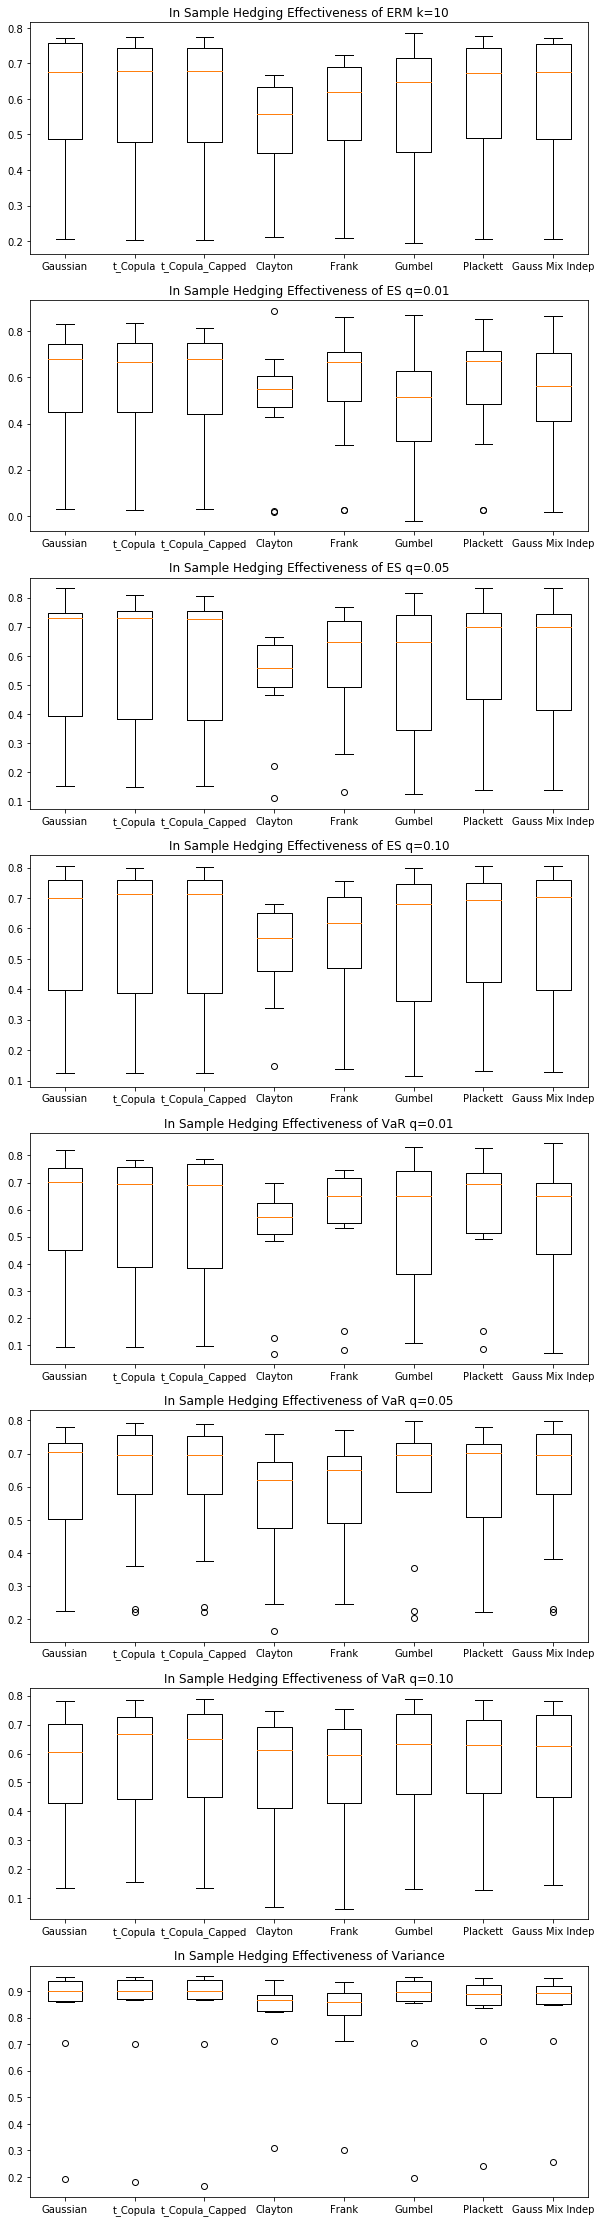

In [247]:
fig, ax = plt.subplots(len(RMs), 1, figsize=(10,5*len(RMs)))
for i, name in enumerate(RMs): 
    ax[i].boxplot(HEs.droplevel(0,axis=1).loc[:,name])
    ax[i].set_xticklabels(HEs.index)
    ax[i].set_title("In Sample Hedging Effectiveness of %s"%name)
    
plt.savefig(result_path+'In Sample Hedging Effectiveness.png', transparent=True)

In [253]:
def hedging_effectiveness(rm, rs, rf, h):
    if rm.startswith('Variance'):
        rh = rs - h*rf
        return 1 - Variance(rh) / Variance(rs)
        
    elif rm.startswith('ERM'):
        k = float(rm[rm.find('=')+1:])
        rh = rs - h*rf
        return 1 - ERM_estimate_trapezoidal(k, rh) / ERM_estimate_trapezoidal(k, rs)
        
    elif rm.startswith('ES'):
        q = float(rm[rm.find('=')+1:])
        rh = rs - h*rf
        return 1 - ES(q, rh) / ES(q, rs)
        
    elif rm.startswith('VaR'):
        q = float(rm[rm.find('=')+1:])
        rh = rs - h*rf
        return 1 - VaR(q, rh) / VaR(q, rs)
    
    
def wrapper_HE(rm, file, h, insample=True):
    if insample:
        data = pd.read_csv(data_path+'train/'+file)
    else:
        data = pd.read_csv(data_path+'test/'+file)
    rs = data.loc[:,spot_name]
    rf = data.loc[:,future_name]
    return hedging_effectiveness(rm, rs, rf, h)

In [12]:

def hedging_effectiveness():
    rs = brr 
    rf = btc
    if RMs[0].startswith('Variance'):
        rh = rs - h*rf
        return 1 - Variance(rh) / Variance(rs)


In [15]:
hedging_effectiveness()

NameError: name 'h' is not defined

In [ ]:
HE_results = []

for i, file in enumerate(ls):
    test = pd.read_csv(data_path+'train/'+file)
    spot   = test.loc[:,spot_name]
    future = test.loc[:,future_name]
    fn = lambda h_arr: hedging_effectiveness(h_arr, spot, future, k_arr, q_arr)
    HE = pd.DataFrame().reindex_like(best_h_results[0])
    HEs = best_h_results[i].apply(fn, axis=1)
    for i in range(len(HEs)):
        HE.iloc[i,:] = HEs[i]
    HE_results.append(HE)
HE_results_pd = pd.concat(dict(zip(ls, HE_results)), axis=1)
risk_measure_names = HE_results_pd.droplevel(0,axis=1).columns.unique()

fig, ax = plt.subplots(len(risk_measure_names), 1, figsize=(10,5*len(risk_measure_names)))
for i, name in enumerate(risk_measure_names): 
    ax[i].boxplot(HE_results_pd.droplevel(0,axis=1).loc[:,name])
    ax[i].set_xticklabels(Copulae_names)
    ax[i].set_title("In Sample Hedging Effectiveness of %s"%name)
    
if calibration_method == "MLE":
    fig.savefig("../results/"+ data_name +"/MLE/"+"In Sample Hedging Effectiveness.png", transparent=True)    
elif calibration_method == "MM":
    fig.savefig("../results/"+ data_name +"/MM/"+"In Sample Hedging Effectiveness.png", transparent=True)

In [338]:
ls

['6.csv',
 '7.csv',
 '5.csv',
 '4.csv',
 '0.csv',
 '1.csv',
 '3.csv',
 '2.csv',
 '10.csv',
 '11.csv',
 '9.csv',
 '8.csv']

In [356]:
train_HE = []
test_HE = []
for file in ls:
    data = pd.read_csv('../processed_data/coingecko_future_v1/train/'+file)
    rs = data.loc[:,'log return bitcoin']
    rf = data.loc[:,'log return future']

    def loss(h, risk_measure):
        rh = rs - h*rf
        return risk_measure(rh)
    
    rm = lambda x:ERM_estimate_trapezoidal(10,x)
#     rm = Variance
    toopt = lambda h: loss(h, rm)
    h = scipy.optimize.fmin(toopt, x0=0.1)
    rh = rs - h*rf
    train_HE.append(1-rm(rh)/rm(rs))
    
    data = pd.read_csv('../processed_data/coingecko_future_v1/test/'+file)
    rs = data.loc[:,'log return bitcoin']
    rf = data.loc[:,'log return future']
    rh = rs - h*rf
    test_HE.append(1-rm(rh)/rm(rs))    

Optimization terminated successfully.
         Current function value: 0.024258
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.023140
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 0.024887
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.024977
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: 0.014868
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 0.018338
         Iterations: 19
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 0.023839
         Iterations: 20
         Function evaluations: 40
Optimization terminated successful

[]

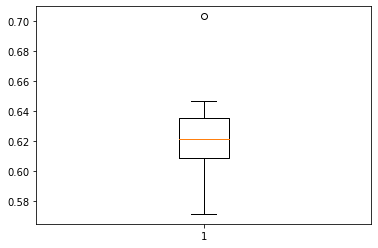

In [357]:
plt.boxplot(train_HE)
# plt.boxplot(test_HE)
plt.plot()

In [431]:
def l_fn(theta, x):
    alpha, beta, mu, delta = theta
    if np.abs(beta) > np.abs(alpha):
        return -5000
    if alpha > 500:
        return -5000
    NIG = norminvgauss(alpha,beta,mu,delta)
    return np.nansum(np.log(NIG.pdf(x)))

In [432]:
toopt = lambda theta: -l_fn(theta, rs)

In [433]:
theta = scipy.optimize.fmin(toopt,
                            x0=(1,0,0,1), xtol=1e-10,
                            maxiter=50000,maxfun=4000)

Optimization terminated successfully.
         Current function value: -67.165659
         Iterations: 445
         Function evaluations: 850


In [434]:
theta

array([1.42908927e+02, 2.51677154e+00, 4.26261699e-03, 9.51540337e-02])

In [435]:
alpha, beta, mu, delta = theta
NIG = norminvgauss(alpha,beta,mu,delta)

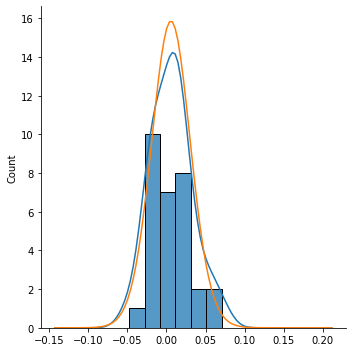

In [449]:
x_arr = np.linspace(min(rs)*3, max(rs)*3, 100)
sns.displot(rs)
plt.plot(x_arr, [kde_rs.pdf(x) for x in x_arr])
plt.plot(x_arr, NIG.pdf(x_arr))

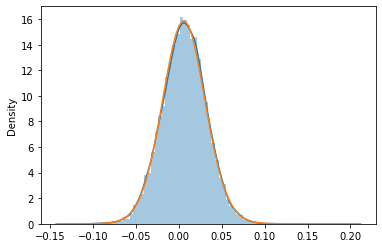

In [442]:
sns.distplot(NIG.rvs(10000))